
<meta name="viewport" content="width=device-width, initial-scale=1">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/css/bootstrap.min.css" rel="stylesheet">
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.2/css/all.min.css">
<link rel="stylesheet" href="./static/css/styles.css">


        
<!-- <body> -->
<!-- Navigation-->
<nav class="navbar navbar-expand-lg navbar-light fixed-top" id="mainNav">
    <div class="container px-4 px-lg-5">
        <!-- <a class="navbar-brand" href="../index.html">Home</a> -->
        <button class="navbar-toggler" type="button" data-bs-toggle="collapse" data-bs-target="#navbarResponsive" aria-controls="navbarResponsive" aria-expanded="false" aria-label="Toggle navigation">
            Menu
            <i class="fas fa-bars"></i>
        </button>
        <div class="collapse navbar-collapse" id="navbarResponsive">
            <ul class="navbar-nav ms-auto py-4 py-lg-0">
                <!-- <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="../index.html">Executive Summary</a></li> -->
                <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="./notebooks/eda.html">Exploratory Data Analysis</a></li>
                <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="./notebooks/models.html">Model Construction & Validation</a></li>
                <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="./notebooks/initial_work.html">Reference: Model Development</a></li>
            </ul>
        </div>
    </div>
</nav>



<link rel="stylesheet" href="../static/css/styles.css">

<h2 id="title" style="text-align: center; width: 80%;">Executive Summary</h2>

# Table of Contents

- [Pace: Plan](#pace-plan)
  - [Imports](#imports)
  - [Data Exploration (Initial EDA and data cleaning)](#data-exploration-initial-eda-and-data-cleaning)
- [pAce: Analyze Stage](#pace-analyze-stage)
  - [Data Visualization and EDA](#data-visualization-and-eda)
- [paCe: Construct Stage](#pace-construct-stage)
  - [Model Building](#model-building)
  - [Baseline Models](#baseline-models)
  - [Feature Engineering (Round One)](#feature-engineering-round-one)
  - [Feature Engineering (Round Two)](#feature-engineering-round-two)
  - [Model Evaluation Results](#model-evaluation-results)
- [pacE: Execute Stage](#pace-execute-stage)
  - [Results and Evaluation](#results-and-evaluation)

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


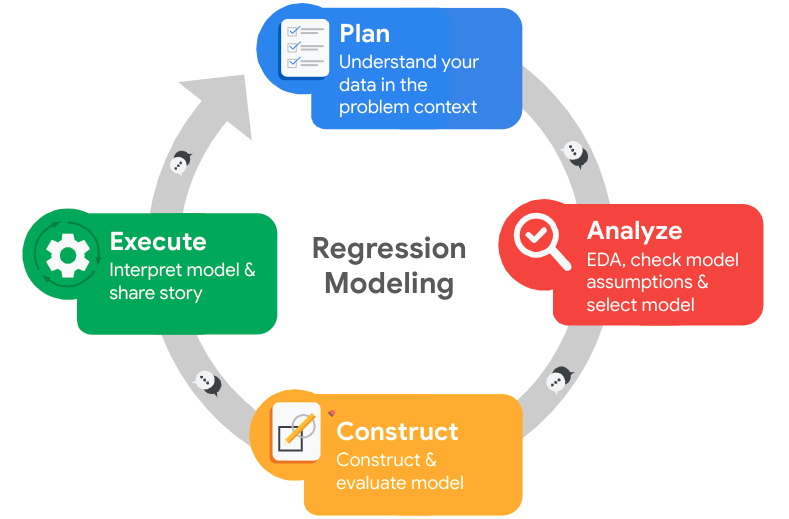

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

> **Stakeholders:**  
> The primary stakeholder is the Human Resources (HR) department, as they will use the results to inform retention strategies. Secondary stakeholders include C-suite executives who oversee company direction, managers implementing day-to-day retention efforts, employees (whose experiences and outcomes are directly affected), and, indirectly, customers—since employee satisfaction can impact customer satisfaction.
>
> **Project Goal:**  
> The objective is to build a predictive model to identify which employees are likely to leave the company. The model should be interpretable so HR can design targeted interventions to improve retention, rather than simply flagging at-risk employees without actionable insights.
>
> **Initial Data Observations:**  
> - The workforce displays moderate satisfaction and generally high performance reviews.
> - Typical tenure is 3–4 years, with most employees (98%) not promoted recently.
> - Workplace accidents are relatively rare (14%).
> - Most employees are in lower salary bands and concentrated in sales, technical, and support roles.
> - About 24% of employees have left the company.
> - No extreme outliers, though a few employees have unusually long tenures or high monthly hours.
>
> **Resources Used:**  
> - [Data dictionary](./data_dictionary_salifort.md)  
> - [pandas documentation](https://pandas.pydata.org/docs/)  
> - [matplotlib documentation](https://matplotlib.org/stable/users/index.html)  
> - [seaborn documentation](https://seaborn.pydata.org/)  
> - [scikit-learn documentation](https://scikit-learn.org/stable/user_guide.html)  
> - [Kaggle HR Analytics Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
>
> **Ethical Considerations:**  
> - Ensure employee data privacy and confidentiality throughout the analysis.
> - Avoid introducing or perpetuating bias in model predictions (e.g., not unfairly targeting specific groups).
> - Maintain transparency in how predictions are generated and how they will be used in HR decision-making.

<a id="imports"></a>

## Imports
[Back to top](#)

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import time
import joblib
import os

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from IPython.display import Image, display

from sklearn.model_selection import (
    StratifiedKFold,
    cross_val_predict,
    GridSearchCV,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)

In [2]:
# get initial time, for measuring performance at the end
nb_start_time = time.time()

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("../resources/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

<a id="data-exploration-initial-eda-and-data-cleaning"></a>

## Data Exploration (Initial EDA and data cleaning)
[Back to top](#)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Department value counts and percent
dept_counts = df0.Department.value_counts()
dept_percent = df0.Department.value_counts(normalize=True) * 100
dept_summary = pd.DataFrame({"Count": dept_counts, "Percent": dept_percent.round(2)})
print("Department value counts and percent:\n", dept_summary)

# Salary value counts and percent
salary_counts = df0.salary.value_counts()
salary_percent = df0.salary.value_counts(normalize=True) * 100
salary_summary = pd.DataFrame(
    {"Count": salary_counts, "Percent": salary_percent.round(2)}
)
print("\nSalary value counts and percent:\n", salary_summary)

Department value counts and percent:
              Count  Percent
Department                 
sales         4140    27.60
technical     2720    18.13
support       2229    14.86
IT            1227     8.18
product_mng    902     6.01
marketing      858     5.72
RandD          787     5.25
accounting     767     5.11
hr             739     4.93
management     630     4.20

Salary value counts and percent:
         Count  Percent
salary                
low      7316    48.78
medium   6446    42.98
high     1237     8.25


In [6]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

> #### **Observations from descriptive statistics**
>
> - **satisfaction_level:** Employee job satisfaction scores range from 0.09 to 1.0, with an average of about 0.61. The distribution is fairly wide (std ≈ 0.25), suggesting a mix of satisfied and dissatisfied employees.
> - **last_evaluation:** Performance review scores are generally high (mean ≈ 0.72), ranging from 0.36 to 1.0, with most employees scoring above 0.56.
> - **number_project:** Employees typically work on 2 to 7 projects, with a median of 4 projects.
> - **average_monthly_hours:** The average employee works about 201 hours per month, with a range from 96 to 310 hours, indicating some employees work significantly more than others.
> - **time_spend_company:** Most employees have been with the company for 2 to 10 years, with a median of 3 years. There are a few long-tenure employees (up to 10 years), but most are around 3–4 years.
> - **Work_accident:** About 14% of employees have experienced a workplace accident.
> - **left:** About 24% of employees have left the company (mean ≈ 0.24), so roughly one in four employees in the dataset is a leaver.
> - **promotion_last_5years:** Very few employees (about 2%) have been promoted in the last five years.
> - **department:** The largest departments are sales, technical, and support, which together account for over half of the workforce. Other departments are notably smaller.
> - **salary:** Most employees are in the low (49%) or medium (43%) salary bands, with only a small proportion (8%) in the high salary band.
>
> **Summary:**  
> The data shows a workforce with moderate satisfaction, generally high performance reviews, and a typical tenure of 3–4 years. Most employees have not been promoted recently, and workplace accidents are relatively uncommon. Most employees are in lower salary bands and concentrated in sales, technical, and support roles. There is a notable proportion of employees who have left. There are no extreme outliers, but a few employees have unusually long tenures or high monthly hours.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0.rename(
    columns={
        "Department": "department",
        "Work_accident": "work_accident",
        "average_montly_hours": "average_monthly_hours",
        "time_spend_company": "tenure",
    },
    inplace=True,
)


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

> There are 3,008 duplicate rows in the dataset. Since it is highly improbable for two employees to have identical responses across all columns, these duplicate entries should be removed from the analysis.

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB
None


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

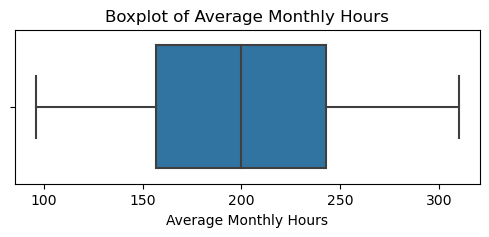

In [13]:
# Boxplot of `average_monthly_hours` to visualize distribution and detect outliers
plt.figure(figsize=(6, 2))
sns.boxplot(x=df["average_monthly_hours"])
plt.title("Boxplot of Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.show()

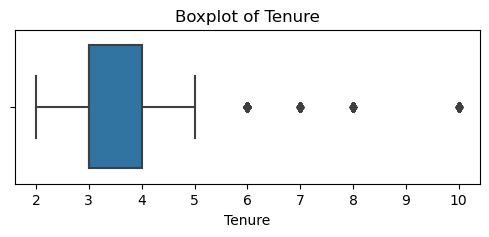

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 2))
sns.boxplot(x=df["tenure"])
plt.title("Boxplot of Tenure")
plt.xlabel("Tenure")
plt.show()

In [15]:
# Determine the number of rows containing outliers
q1 = df.tenure.quantile(0.25)
q3 = df.tenure.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# Filter the dataframe to find outliers
outliers = df[df.tenure > upper_bound]

# Display the number of outliers
print(f"Number of tenure outliers: {len(outliers)}")
print(f"Outliers percentage of total: {len(outliers) / len(df) * 100:.2f}%")

Number of tenure outliers: 824
Outliers percentage of total: 6.87%


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

<a id="pace-analyze-stage"></a>

# pAce: Analyze Stage
[Back to top](#)

- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




>
> **Two Distinct Populations of Leavers:**  
> There are two major groups of employees who left the company:
> - **Underworked and Dissatisfied:** These employees had low satisfaction and worked fewer hours and projects. They may have been fired. Alternately, they may have given notice or had already mentally checked out and were assigned less work.
> - **Overworked and Miserable:** These employees had low satisfaction but were assigned a high number of projects (6–7) and worked 250–300 hours per month. Notably, 100% of employees with 7 projects left.  
>
> Employees working on 3–4 projects generally stayed. Most groups worked more than a typical 40-hour workweek. 
>
> Attrition is highest at the 4–5 year mark, with a sharp drop-off in departures after 5 years. This suggests a critical window for retention efforts. Employees who make it past 5 years are much more likely to stay.
>
> Both leavers and stayers tend to have similar evaluation scores, though some employees with high evaluations still leave—often those who are overworked. This suggests that strong performance alone does not guarantee retention if other factors (like satisfaction or workload) are problematic.
> 
> **Relationships Between Variables:**
> - **Satisfaction level** is the strongest predictor of attrition. Employees who left had much lower satisfaction than those who stayed.
> - **Number of projects** and **average monthly hours** show a non-linear relationship: both underworked and overworked employees are more likely to leave, while those with a moderate workload tend to stay.
> - **Employee evaluation** (last performance review) has a weaker relationship with attrition compared to satisfaction or workload. 
> - **Tenure** shows a moderate relationship with attrition: employees are most likely to leave at the 4–5 year mark, with departures dropping sharply after 5 years.
> - **Promotion in the last 5 years** is rare, and lack of promotion is associated with higher attrition.
> - **Department** and **salary** have only minor effects on attrition compared to satisfaction and workload.
> - **Work accidents** are slightly associated with lower attrition, possibly due to increased support after an incident.
> 
> **Distributions in the Data:**
> - Most variables (satisfaction, evaluation, monthly hours) are broadly distributed, with some skewness.
> - **Tenure** is concentrated around 3–4 years, with few employees beyond 5 years.
> - **Number of projects** is typically 3–4, but a small group has 6–7 projects (most of whom left).
> - **Salary** is heavily skewed toward low and medium bands.
> - There are no extreme outliers, but a few employees have unusually high tenure or monthly hours.
> 
> **Data Transformations:**
> - **Renamed columns** to standardized, snake_case format for consistency and easier coding.
> - **Removed duplicate rows** (about 3,000) to ensure each employee is only represented once.
> - **Checked for and confirmed absence of missing values** to avoid bias or errors in analysis.
> - **Explored outliers** but did not remove them at this stage, as their impact will be considered during modeling.
> 
> **Purposes of EDA Before Modeling:**
> - Understand the structure, quality, and distribution of the data.
> - Identify key variables and relationships that may influence attrition.
> - Detect and address data quality issues (duplicates, missing values, outliers).
> - Inform feature selection and engineering for modeling.
> - Ensure assumptions for modeling (e.g., independence, lack of multicollinearity) are reasonable.
> 
> **Resources Used:**
> - [pandas documentation](https://pandas.pydata.org/docs/)
> - [matplotlib documentation](https://matplotlib.org/stable/users/index.html)
> - [seaborn documentation](https://seaborn.pydata.org/)
> - [scikit-learn documentation](https://scikit-learn.org/stable/user_guide.html)
> - [Kaggle HR Analytics Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
> 
> **Ethical Considerations:**
> - Ensure employee data privacy and confidentiality.
> - Avoid introducing or perpetuating bias in analysis or modeling.
> - Be transparent about how findings and predictions will be used.
> - Consider the impact of recommendations on employee well-being and fairness.
> 
> **Note:**  
> This data is clearly synthetic—it's too clean, and the clusters in the charts are much neater than what you’d see in real-world HR data.  
>

<a id="data-visualization-and-eda"></a>

## Data Visualization and EDA
[Back to top](#)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
# Get percentages of people who left vs. stayed
left_counts = df.left.value_counts()
left_percent = df.left.value_counts(normalize=True) * 100

left_summary = pd.DataFrame({"Count": left_counts, "Percent": left_percent.round(2)})

left_summary.index = left_summary.index.map({0: "Stayed", 1: "Left"})
left_summary

Count  Percent
left                  
Stayed  10000     83.4
Left     1991     16.6

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

> I'll start with everything at once, then show individual plots

c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

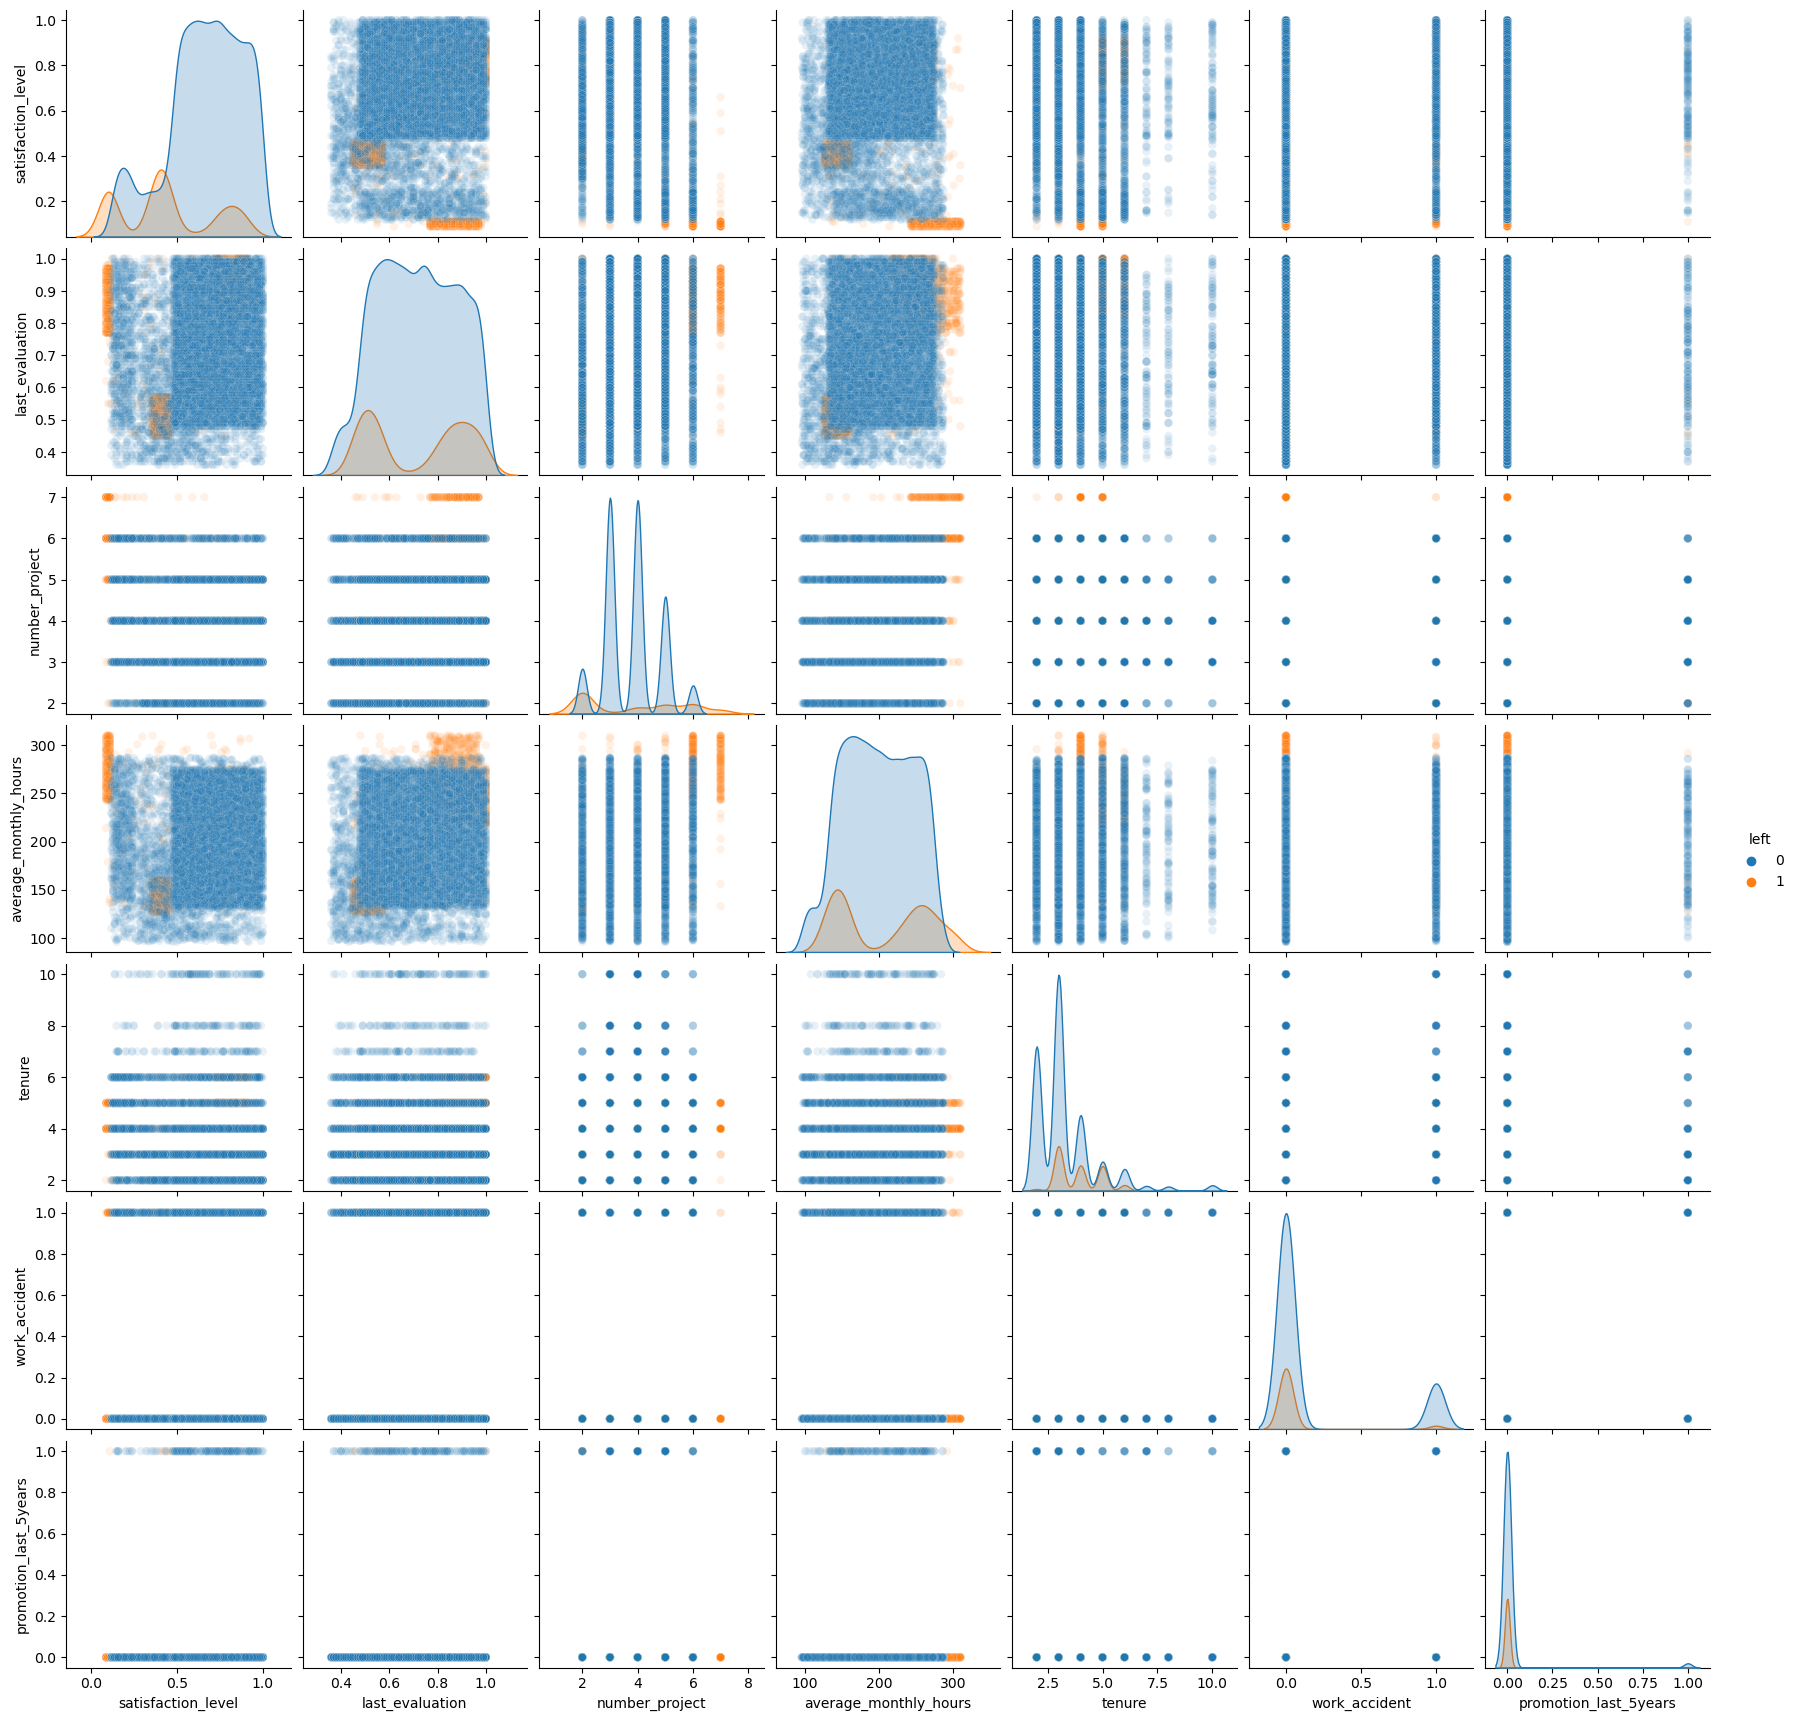

In [17]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue="left", diag_kind="kde", plot_kws={"alpha": 0.1})
plt.show()

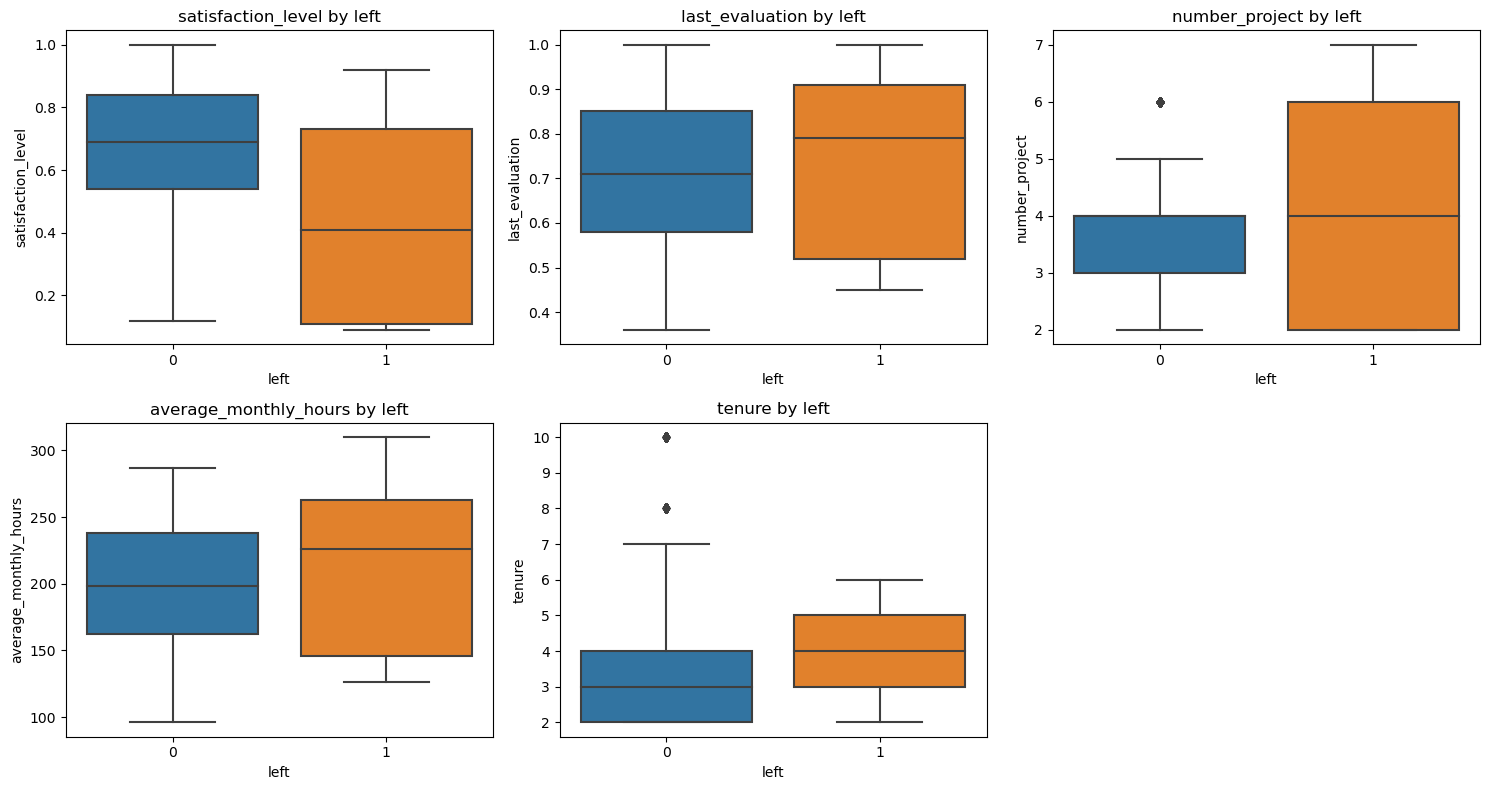

In [18]:
# Boxplots to visualize distributions of numerical features by `left`
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="left", y=col, data=df)
    plt.title(f"{col} by left")
plt.tight_layout()
plt.show()

> Left has a few subgroups (the absoultely miserable and overworked, and the dissatisfied and underworked, along with those that, presumably, normally leave). Violin plots will be more informative than boxplots to show these.

In [19]:
# Violin plots to visualize distributions of numerical features by `left`
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x="left", y=col, data=df, inner="box")
    plt.title(f"{col} by left")
plt.tight_layout()
plt.show()

c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: Fut

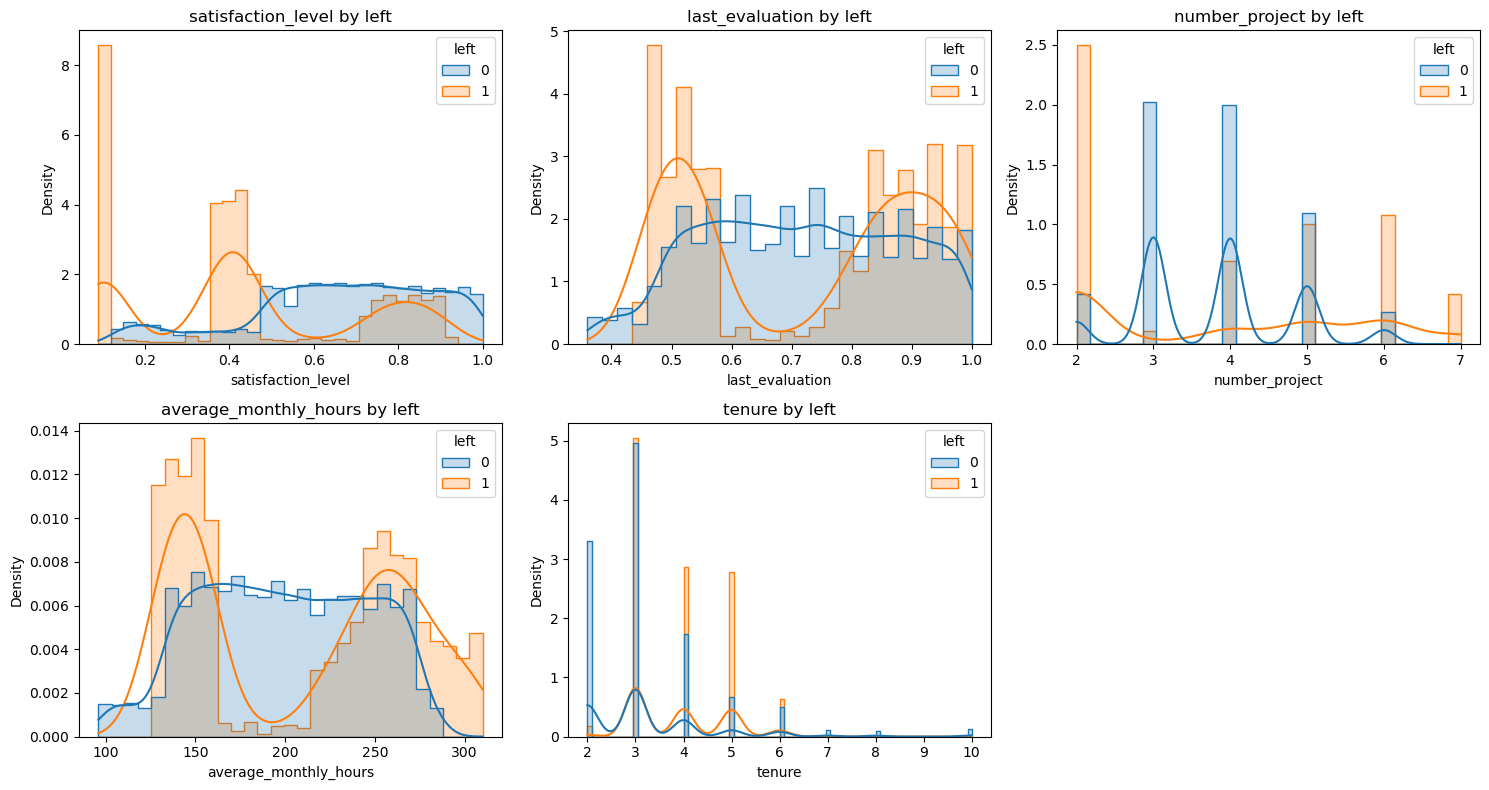

In [20]:
# Histograms to visualize distributions of numerical features
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(
        data=df,
        x=col,
        hue="left",
        kde=True,
        element="step",
        stat="density",
        common_norm=False,
    )
    plt.title(f"{col} by left")
plt.tight_layout()
plt.show()

> Normalized above, true count below.

c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: Fut

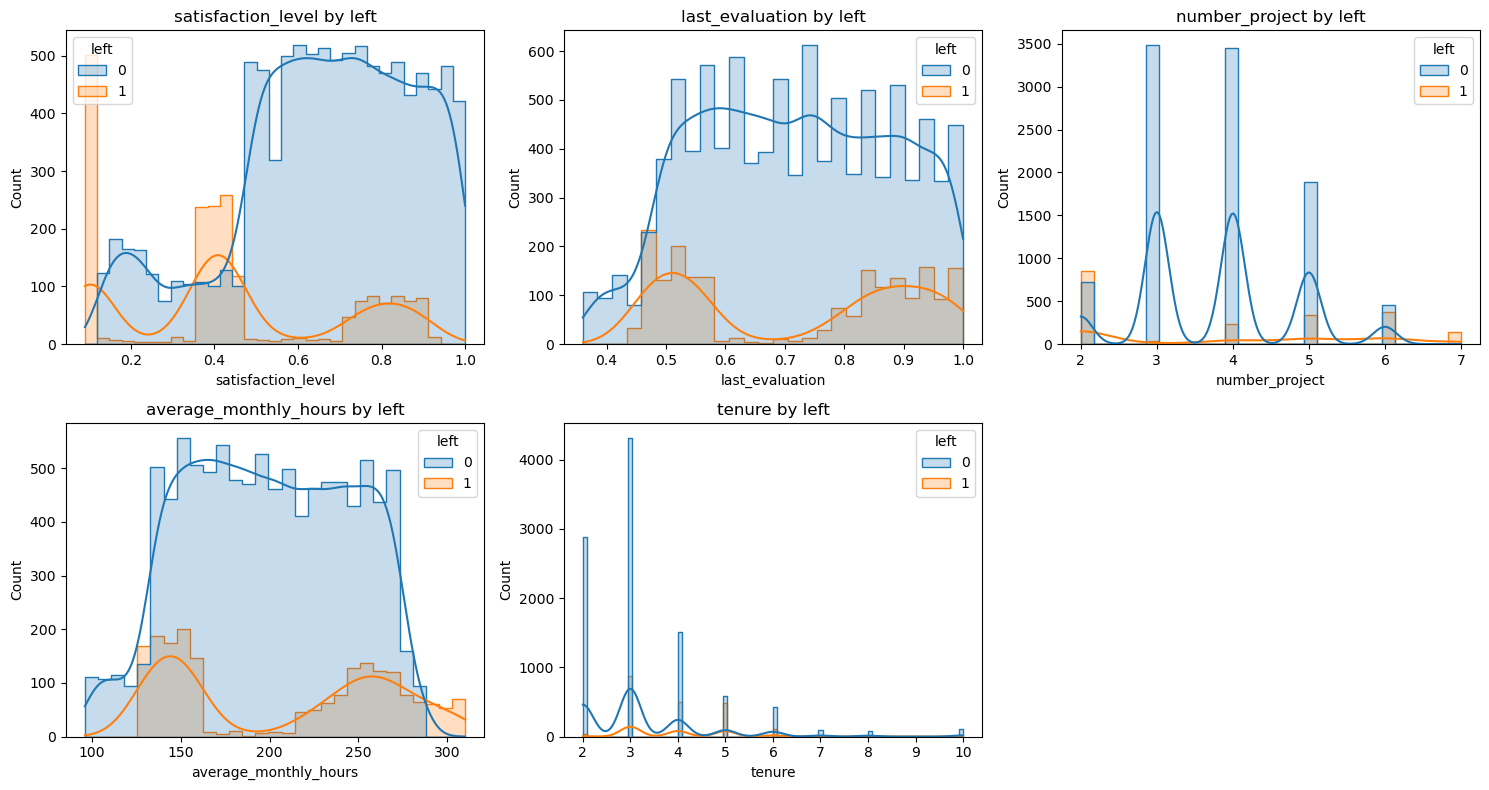

In [21]:
# Histograms to visualize distributions of numerical features (showing true count)
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, hue="left", kde=True, element="step", stat="count")
    plt.title(f"{col} by left")
plt.tight_layout()
plt.show()

In [22]:
# Plot satisfaction vs. hours worked, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="average_monthly_hours",
    hue="left",
    alpha=0.3,
)
plt.title("Satisfaction vs. Average Monthly Hours")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="upper right", labels=["Left", "Stayed"])
plt.show()

> Two big clusters of leavers: One absolutely miserable section that worked a lot of hours, and one clump that worked under a 40-hour week that was mildly dissatisfied.

In [23]:
# Plot satisfaction level vs last evaluation, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="last_evaluation",
    hue="left",
    alpha=0.3,
)
plt.title("Satisfaction Level vs. Last Evaluation")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.legend(loc="lower right", labels=["Left", "Stayed"])
plt.show()

> It looks like almost the same plot for leavers. The absolutely miserable got pretty good evaluations, and the mildly dissatisfied got middling evaluations.

In [24]:
# Get mean and median satisfaction level for those who left vs. stayed
mean_satisfaction = df.groupby("left")["satisfaction_level"].mean()
median_satisfaction = df.groupby("left")["satisfaction_level"].median()

satisfaction_summary = pd.DataFrame(
    {"Mean": mean_satisfaction, "Median": median_satisfaction}
)

satisfaction_summary.index = satisfaction_summary.index.map({0: "Stayed", 1: "Left"})
satisfaction_summary

Mean  Median
left                    
Stayed  0.667365    0.69
Left    0.440271    0.41

> Those that left were 22% (mean) / 28% (median) less satisfied than those that stayed. Note the slight left skew with those that stayed (median higher than mean).

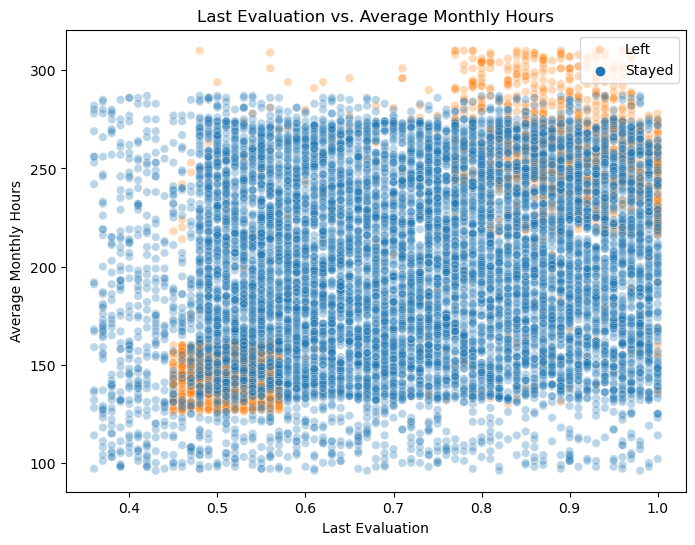

In [25]:
# Plot last evaluation vs. average monthly hours, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="last_evaluation",
    y="average_monthly_hours",
    hue="left",
    alpha=0.3,
)
plt.title("Last Evaluation vs. Average Monthly Hours")
plt.xlabel("Last Evaluation")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="upper right", labels=["Left", "Stayed"])
plt.show()

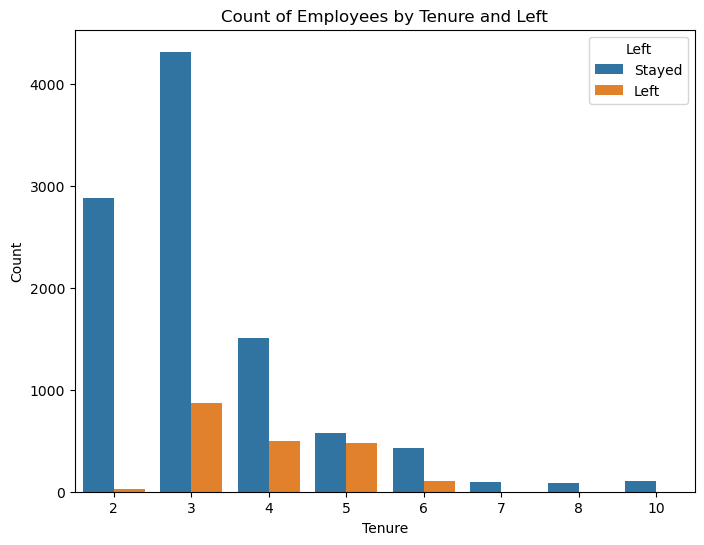

In [26]:
# Bar plot of tenure by left
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="tenure", hue="left")
plt.title("Count of Employees by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

> People especially quit at the 4 and 5 year mark. Almost nobody quits after 5 years. There's a group that just flees this company.

In [27]:
# Get total and percentage of employees by tenure and left
tenure_counts = df.groupby(["tenure", "left"]).size().unstack(fill_value=0)
tenure_percent = tenure_counts.div(tenure_counts.sum(axis=1), axis=0) * 100
tenure_summary = pd.DataFrame(
    {"Count": tenure_counts.stack(), "Percent": tenure_percent.stack()}
).reset_index()
tenure_summary.columns = ["Tenure", "Left", "Count", "Percent"]
tenure_summary["Left"] = tenure_summary["Left"].map({0: "Stayed", 1: "Left"})
tenure_summary

Tenure    Left  Count     Percent
0        2  Stayed   2879   98.934708
1        2    Left     31    1.065292
2        3  Stayed   4316   83.159923
3        3    Left    874   16.840077
4        4  Stayed   1510   75.311721
5        4    Left    495   24.688279
6        5  Stayed    580   54.613936
7        5    Left    482   45.386064
8        6  Stayed    433   79.889299
9        6    Left    109   20.110701
10       7  Stayed     94  100.000000
11       7    Left      0    0.000000
12       8  Stayed     81  100.000000
13       8    Left      0    0.000000
14      10  Stayed    107  100.000000
15      10    Left      0    0.000000

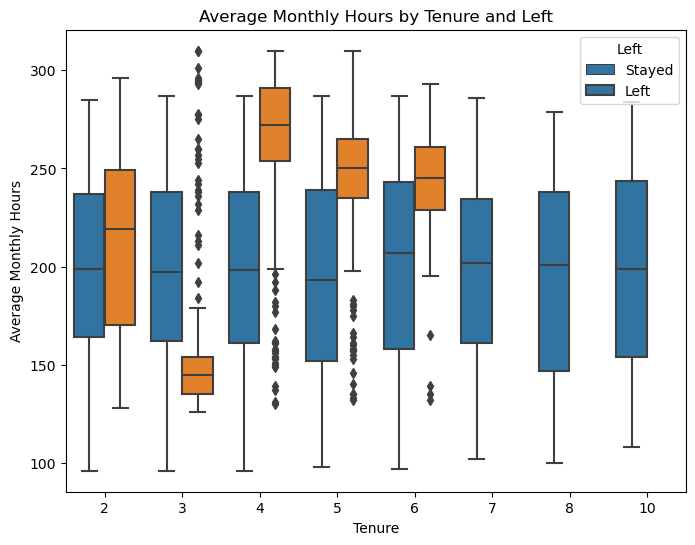

In [28]:
# Boxplot of tenure vs average monthly hours, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="tenure", y="average_monthly_hours", hue="left")
plt.title("Average Monthly Hours by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Average Monthly Hours")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

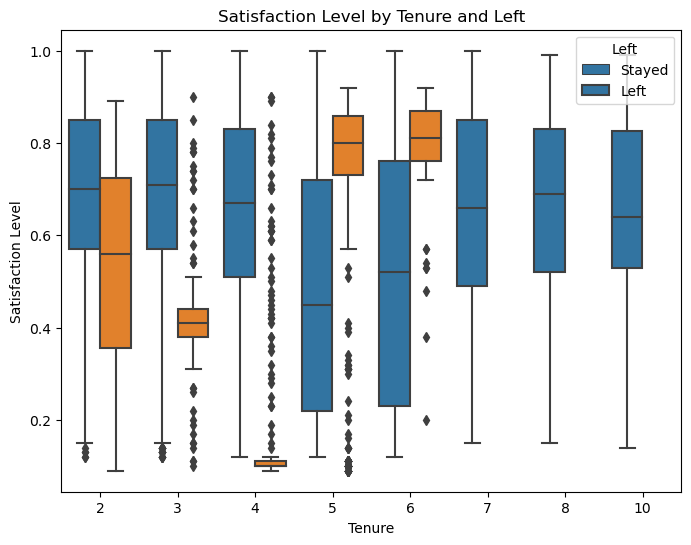

In [29]:
# Box plot of tenure vs satisfaction level, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="tenure", y="satisfaction_level", hue="left")
plt.title("Satisfaction Level by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Satisfaction Level")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

> Weird little clump of four-year employees that are miserable.

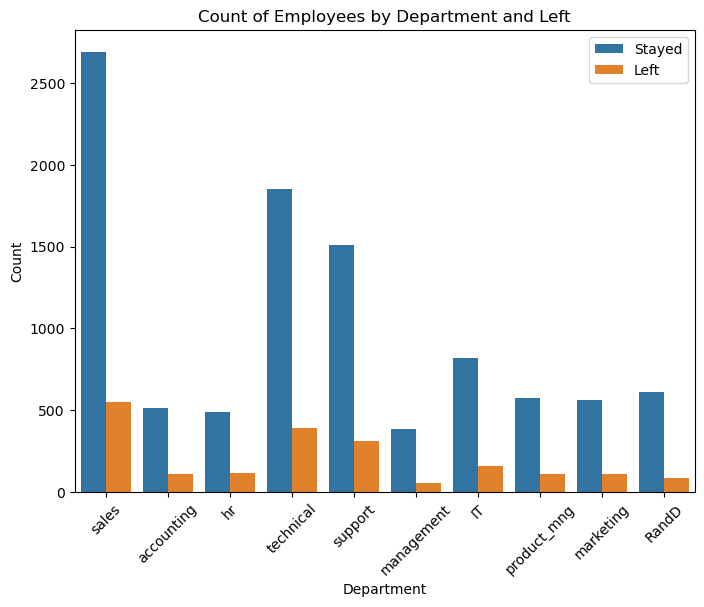

In [30]:
# Bar plot of department vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="department",
    hue="left",
)
plt.title("Count of Employees by Department and Left")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

In [31]:
# Get total and percentage of employees by department and left
dept_counts = df.groupby(["department", "left"]).size().unstack(fill_value=0)

# Calculate percentages within each department (row-wise)
dept_percent = dept_counts.div(dept_counts.sum(axis=1), axis=0) * 100

# Reshape for easier viewing: melt to long format
dept_summary = (
    dept_counts.join(dept_percent, lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="department", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
dept_summary[["Left", "Item"]] = dept_summary["Status"].str.extract(
    r"(\d)_(count|percent)"
)
dept_summary["Left"] = dept_summary["Left"].map({"0": "Stayed", "1": "Left"})

# Pivot so each row is department + Left, with Count and Percent columns
dept_summary = (
    dept_summary.pivot_table(
        index=["department", "Left"], columns="Item", values="Value"
    )
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)

# Round Percent
dept_summary["Percent"] = dept_summary["Percent"].round(2)

dept_summary

Item   department    Left   Count  Percent
0              IT    Left   158.0    16.19
1              IT  Stayed   818.0    83.81
2           RandD    Left    85.0    12.25
3           RandD  Stayed   609.0    87.75
4      accounting    Left   109.0    17.55
5      accounting  Stayed   512.0    82.45
6              hr    Left   113.0    18.80
7              hr  Stayed   488.0    81.20
8      management    Left    52.0    11.93
9      management  Stayed   384.0    88.07
10      marketing    Left   112.0    16.64
11      marketing  Stayed   561.0    83.36
12    product_mng    Left   110.0    16.03
13    product_mng  Stayed   576.0    83.97
14          sales    Left   550.0    16.98
15          sales  Stayed  2689.0    83.02
16        support    Left   312.0    17.13
17        support  Stayed  1509.0    82.87
18      technical    Left   390.0    17.38
19      technical  Stayed  1854.0    82.62

> It's roughly proportional to the overall stay/leave split (83%/17%). Department doesn't appear to have a big impact. More granular details might help (i.e., subgroups of departments with bad managers may have higher attrition rates, but nothing currently jumps out).

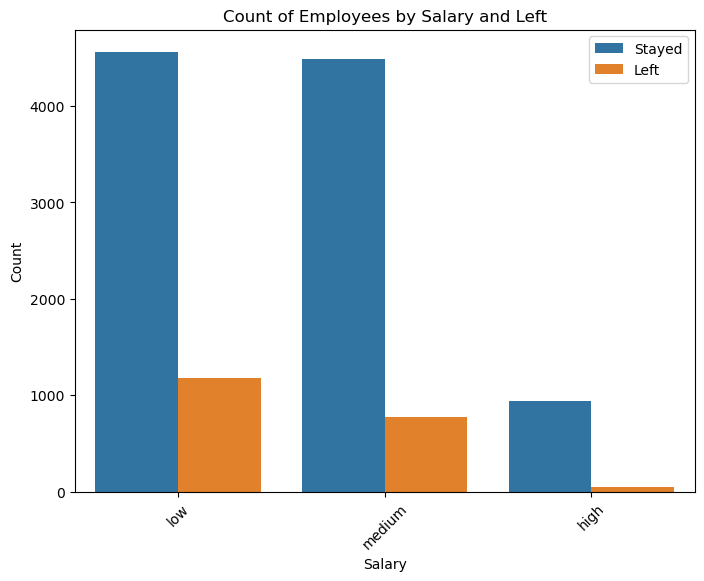

In [32]:
# Bar plot of salary vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="salary",
    hue="left",
)
plt.title("Count of Employees by Salary and Left")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

In [33]:
# Get total and percentage of employees by salary and left
salary_counts = df.groupby(["salary", "left"]).size().unstack(fill_value=0)
salary_percent = salary_counts.div(salary_counts.sum(axis=1), axis=0) * 100

salary_summary = (
    salary_counts.join(salary_percent, lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="salary", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
salary_summary[["Left", "Item"]] = salary_summary["Status"].str.extract(
    r"(\d)_(count|percent)"
)
salary_summary["Left"] = salary_summary["Left"].map({"0": "Stayed", "1": "Left"})

# Pivot so each row is salary + Left, with Count and Percent columns
salary_summary = (
    salary_summary.pivot_table(index=["salary", "Left"], columns="Item", values="Value")
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)
salary_summary["Percent"] = salary_summary["Percent"].round(2)
salary_summary

Item  salary    Left   Count  Percent
0       high    Left    48.0     4.85
1       high  Stayed   942.0    95.15
2        low    Left  1174.0    20.45
3        low  Stayed  4566.0    79.55
4     medium    Left   769.0    14.62
5     medium  Stayed  4492.0    85.38

> I'm not really seeing anything with salary either, beyond the expected attitude of low and high paid employees (note the 'high' salary group size is an order of magnitude smaller than 'low' and 'medium').

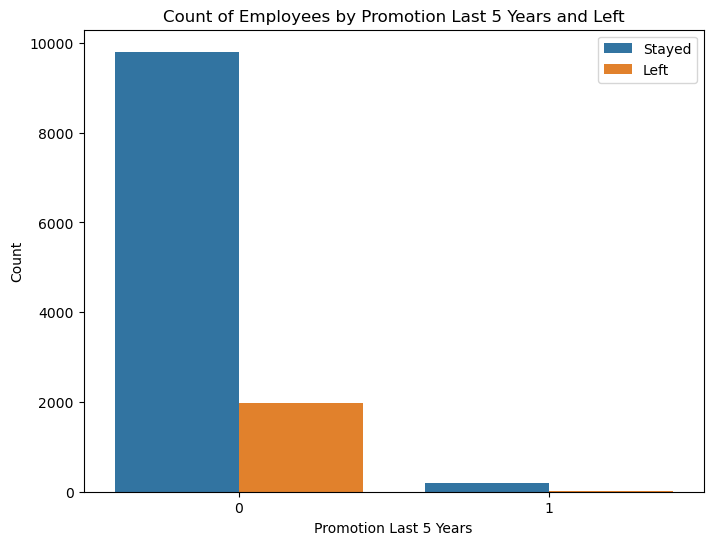

In [34]:
# Bar plot of promotion last 5 years vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="promotion_last_5years",
    hue="left",
)
plt.title("Count of Employees by Promotion Last 5 Years and Left")
plt.xlabel("Promotion Last 5 Years")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

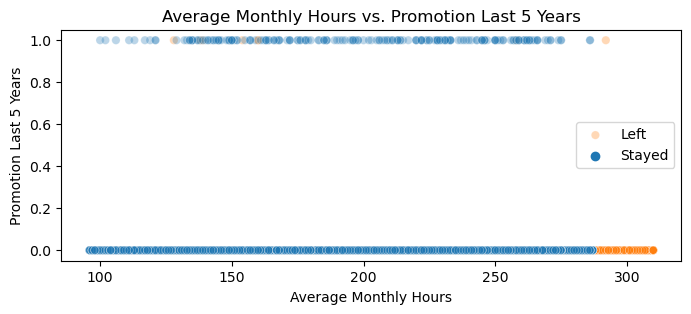

In [35]:
# Scatter plot average monthly hours vs. promotion last 5 years, colored by left
plt.figure(figsize=(8, 3))
sns.scatterplot(
    data=df,
    x="average_monthly_hours",
    y="promotion_last_5years",
    hue="left",
    alpha=0.3,
)
plt.title("Average Monthly Hours vs. Promotion Last 5 Years")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Promotion Last 5 Years")
plt.legend(loc="center right", labels=["Left", "Stayed"])
plt.show()

> Look at that group of overworked employees, not getting promoted. All of the longest working employees left.

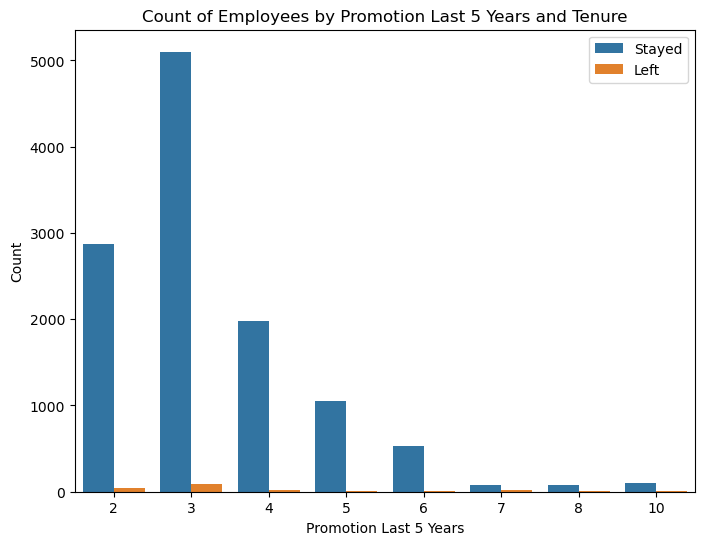

In [36]:
# Bar plot of promotion last 5 years and tenure
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="tenure",
    hue="promotion_last_5years",
)
plt.title("Count of Employees by Promotion Last 5 Years and Tenure")
plt.xlabel("Promotion Last 5 Years")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

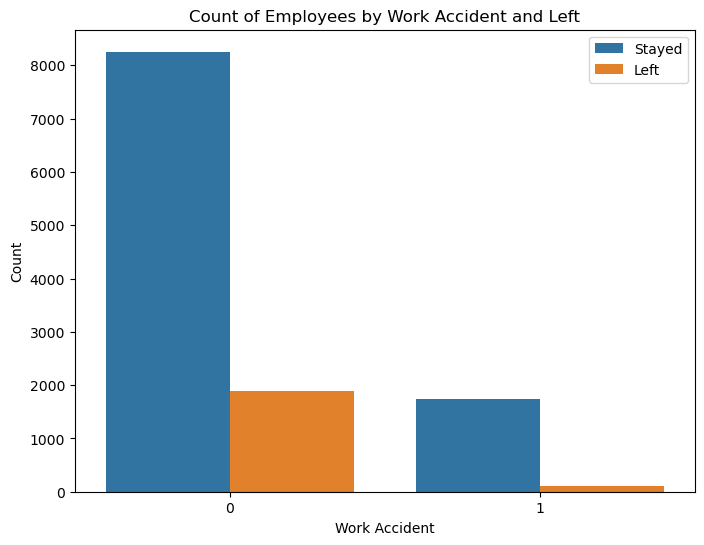

In [37]:
# Bar plot of work accident vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="work_accident",
    hue="left",
)
plt.title("Count of Employees by Work Accident and Left")
plt.xlabel("Work Accident")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

In [38]:
# Count and percentage for work_accident and left (work_accident first)
cross_counts = df.groupby(["work_accident", "left"]).size().unstack(fill_value=0)
cross_percent = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

summary = (
    cross_counts.astype(int)
    .join(cross_percent.round(2), lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="work_accident", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
summary[["left", "Item"]] = summary["Status"].str.extract(r"(\d)_(count|percent)")
summary["left"] = summary["left"].map({"0": "Stayed", "1": "Left"})
summary["work_accident"] = summary["work_accident"].map({0: "No", 1: "Yes"})

# Pivot for easier viewing
summary = (
    summary.pivot_table(index=["work_accident", "left"], columns="Item", values="Value")
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)

summary

Item work_accident    left   Count  Percent
0               No    Left  1886.0    18.60
1               No  Stayed  8255.0    81.40
2              Yes    Left   105.0     5.68
3              Yes  Stayed  1745.0    94.32

> Seems like a fluke, but it's funny that having a work accident is correlated with being less likely to leave. Otherwise, normal

In [39]:
# Bar plot of number of projects vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="number_project",
    hue="left",
)
plt.title("Count of Employees by Number of Projects and Left")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

In [40]:
# Count and percentage for number_project and left (number_project first)
cross_counts = df.groupby(["number_project", "left"]).size().unstack(fill_value=0)
cross_percent = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

summary = (
    cross_counts.astype(int)
    .join(cross_percent.round(2), lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="number_project", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
summary[["left", "Item"]] = summary["Status"].str.extract(r"(\d)_(count|percent)")
summary["left"] = summary["left"].map({"0": "Stayed", "1": "Left"})

# Pivot for easier viewing
summary = (
    summary.pivot_table(
        index=["number_project", "left"], columns="Item", values="Value"
    )
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)

summary

Item  number_project    left   Count  Percent
0                  2    Left   857.0    54.17
1                  2  Stayed   725.0    45.83
2                  3    Left    38.0     1.08
3                  3  Stayed  3482.0    98.92
4                  4    Left   237.0     6.43
5                  4  Stayed  3448.0    93.57
6                  5    Left   343.0    15.36
7                  5  Stayed  1890.0    84.64
8                  6    Left   371.0    44.92
9                  6  Stayed   455.0    55.08
10                 7    Left   145.0   100.00
11                 7  Stayed     0.0     0.00

> Yeah, number of projects is a predictor. Might as well be a giant neon sign blinking here. Ha! 100% of people with 7 projects left.

In [41]:
# Boxplot of number of projects vs. average monthly hours, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="number_project",
    y="average_monthly_hours",
    hue="left",
)
plt.title("Number of Projects vs. Average Monthly Hours")
plt.xlabel("Number of Projects")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="lower right")
plt.show()

> No outliers for those who stayed. Mostly a function of small sample size? Those who left appear to have been either overworked or underworked. Who has 7 projects and works only 120 hours a week? Weird.

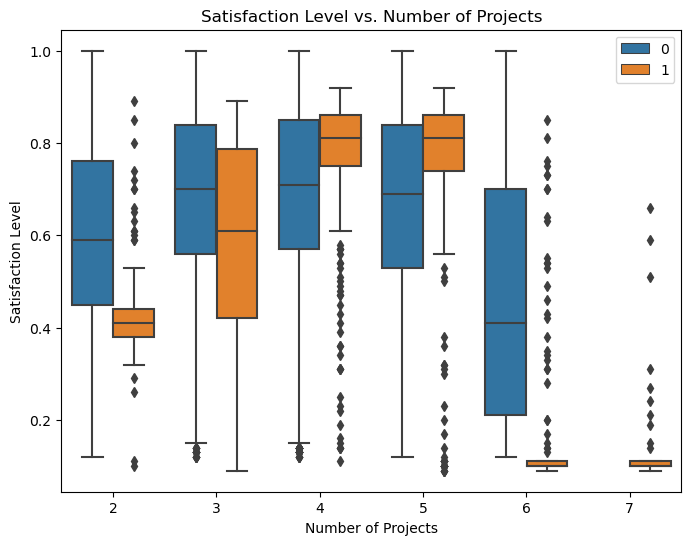

In [42]:
# Boxplot of satisfaction level vs number of projects, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="number_project",
    y="satisfaction_level",
    hue="left",
)
plt.title("Satisfaction Level vs. Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Satisfaction Level")
plt.legend(loc="upper right")
plt.show()

> Look at that clump of miserable people with many projects.

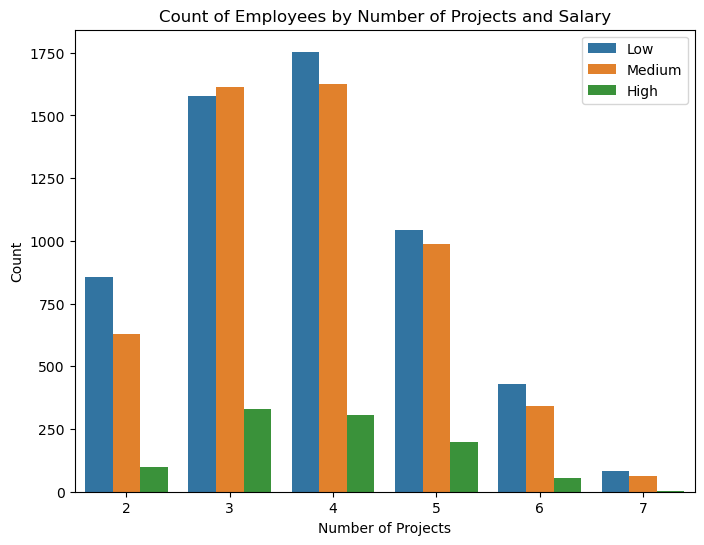

In [43]:
# Bar plot of number of projects vs salary
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="number_project",
    hue="salary",
)
plt.title("Count of Employees by Number of Projects and Salary")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Low", "Medium", "High"])
plt.show()

c:\Users\johbr\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


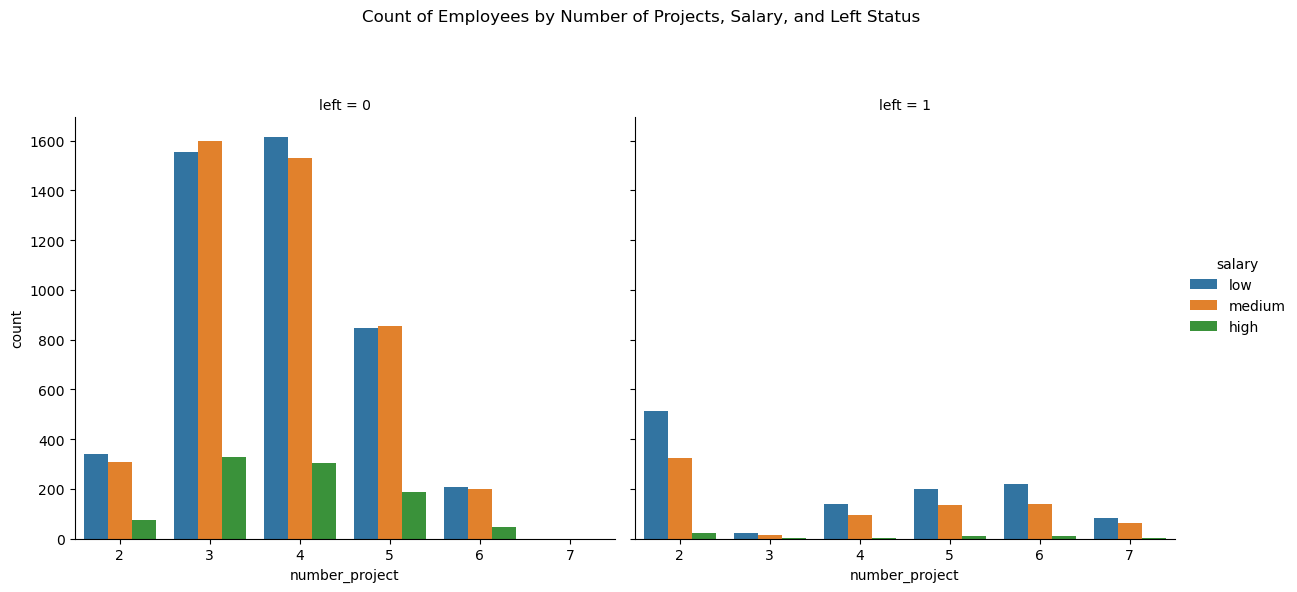

In [44]:
# Bar plot of number of projects vs salary, separated by left
sns.catplot(
    data=df,
    x="number_project",
    hue="salary",
    col="left",
    kind="count",
    height=6,
    aspect=1,
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Count of Employees by Number of Projects, Salary, and Left Status")
plt.show()

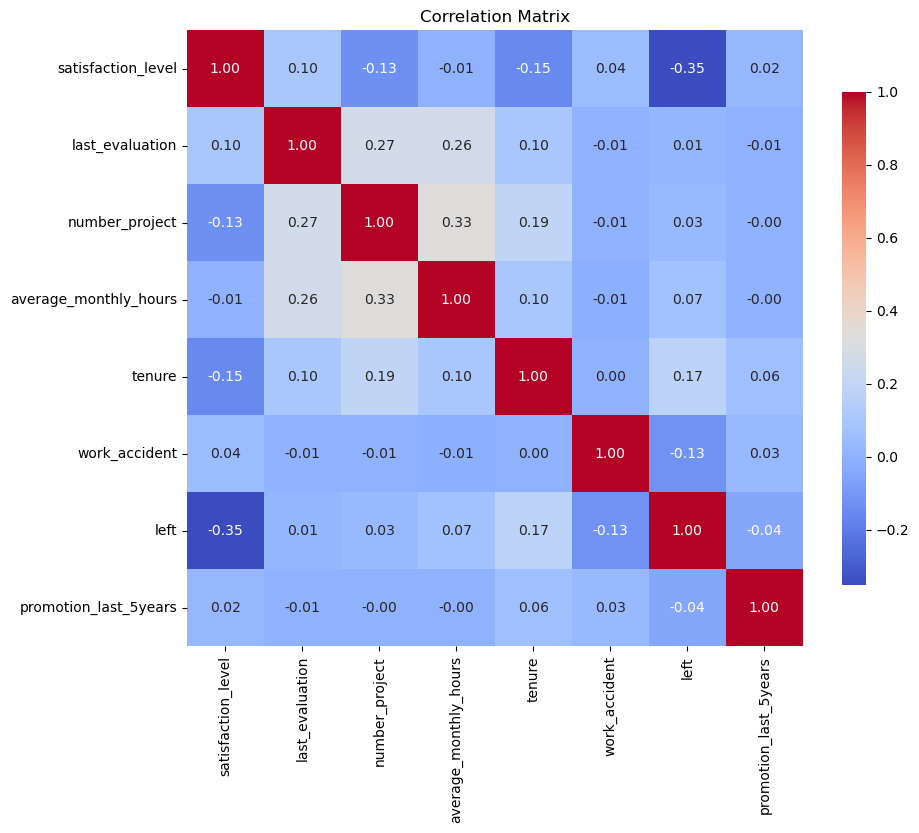

In [45]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.select_dtypes(include=[np.number]).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix")
plt.show()

> No strong multicollinearity. Leaving is negatively correlated with satisfaction. Monthly hours, evaluations, and number of projects are somewhat positively correlated.

### Insights

> The data suggests significant issues with employee retention at this company. Two main groups of leavers emerge:
>
> - **Underworked and Dissatisfied:** Some employees worked on fewer projects and logged fewer hours than a standard work week, with below-average satisfaction. These individuals may have been disengaged, assigned less work as they prepared to leave, or possibly let go.
> - **Overworked and Burned Out:** Another group managed a high number of projects (up to 7) and worked exceptionally long hours (sometimes approaching 80-hour weeks). This group reported very low satisfaction and received few, if any, promotions.
>
> Most employees work well above a typical 40-hour work week (160–184 hours/month, 20-23 work days/month), indicating a culture of overwork. The lack of promotions and high workload likely contribute to dissatisfaction and attrition.
>
> **Employee evaluation scores** show only a weak relationship with attrition; both leavers and stayers have similar performance reviews. High-performing employees are not necessarily retained, especially if they are overworked or dissatisfied.
>
> Other variables—such as department, salary, and work accidents—do not show strong predictive value for employee churn compared to satisfaction and workload.
>
> Overall, the data points to management and workload issues as primary drivers of employee turnover.



<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/js/bootstrap.bundle.min.js"></script>
<script src="../static/js/scripts.js"></script>

